In [8]:
import pandas as pd
df = pd.read_csv('hw5_treasury yield curve data.csv')
print('File name:', 'hw5_treasury yield curve data')
print('Rows:', df.shape[0])
print('Columns:', df.shape[1])

File name: hw5_treasury yield curve data
Rows: 8071
Columns: 32


In [21]:
print('Data infomation:')
print('    ')
df.info()

Data infomation:
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8071 entries, 0 to 8070
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8071 non-null   object 
 1   SVENF01    8071 non-null   float64
 2   SVENF02    8071 non-null   float64
 3   SVENF03    8071 non-null   float64
 4   SVENF04    8071 non-null   float64
 5   SVENF05    8071 non-null   float64
 6   SVENF06    8071 non-null   float64
 7   SVENF07    8071 non-null   float64
 8   SVENF08    8071 non-null   float64
 9   SVENF09    8071 non-null   float64
 10  SVENF10    8071 non-null   float64
 11  SVENF11    8071 non-null   float64
 12  SVENF12    8071 non-null   float64
 13  SVENF13    8071 non-null   float64
 14  SVENF14    8071 non-null   float64
 15  SVENF15    8071 non-null   float64
 16  SVENF16    8071 non-null   float64
 17  SVENF17    8071 non-null   float64
 18  SVENF18    8071 non-null   float64
 19  SVENF19    8071 non-null  

In [27]:
print('Data description:')
print(' ')
print(df.describe())

Data description:
 
           SVENF01      SVENF02      SVENF03      SVENF04      SVENF05  \
count  8071.000000  8071.000000  8071.000000  8071.000000  8071.000000   
mean      3.785311     4.258972     4.669363     5.022430     5.318493   
std       2.648060     2.498137     2.341348     2.221632     2.137801   
min       0.072700     0.327300     0.630300     1.013000     1.424500   
25%       1.144050     1.865600     2.536550     3.023050     3.544700   
50%       3.986500     4.393300     4.505500     4.718900     5.051300   
75%       5.901500     6.221250     6.461300     6.626600     6.779550   
max       9.813800     9.887800    10.145600    10.459900    10.649900   

           SVENF06      SVENF07      SVENF08      SVENF09      SVENF10  ...  \
count  8071.000000  8071.000000  8071.000000  8071.000000  8071.000000  ...   
mean      5.559644     5.750071     5.895135     6.000596     6.072112  ...   
std       2.080405     2.040337     2.010786     1.987244     1.966960  ... 

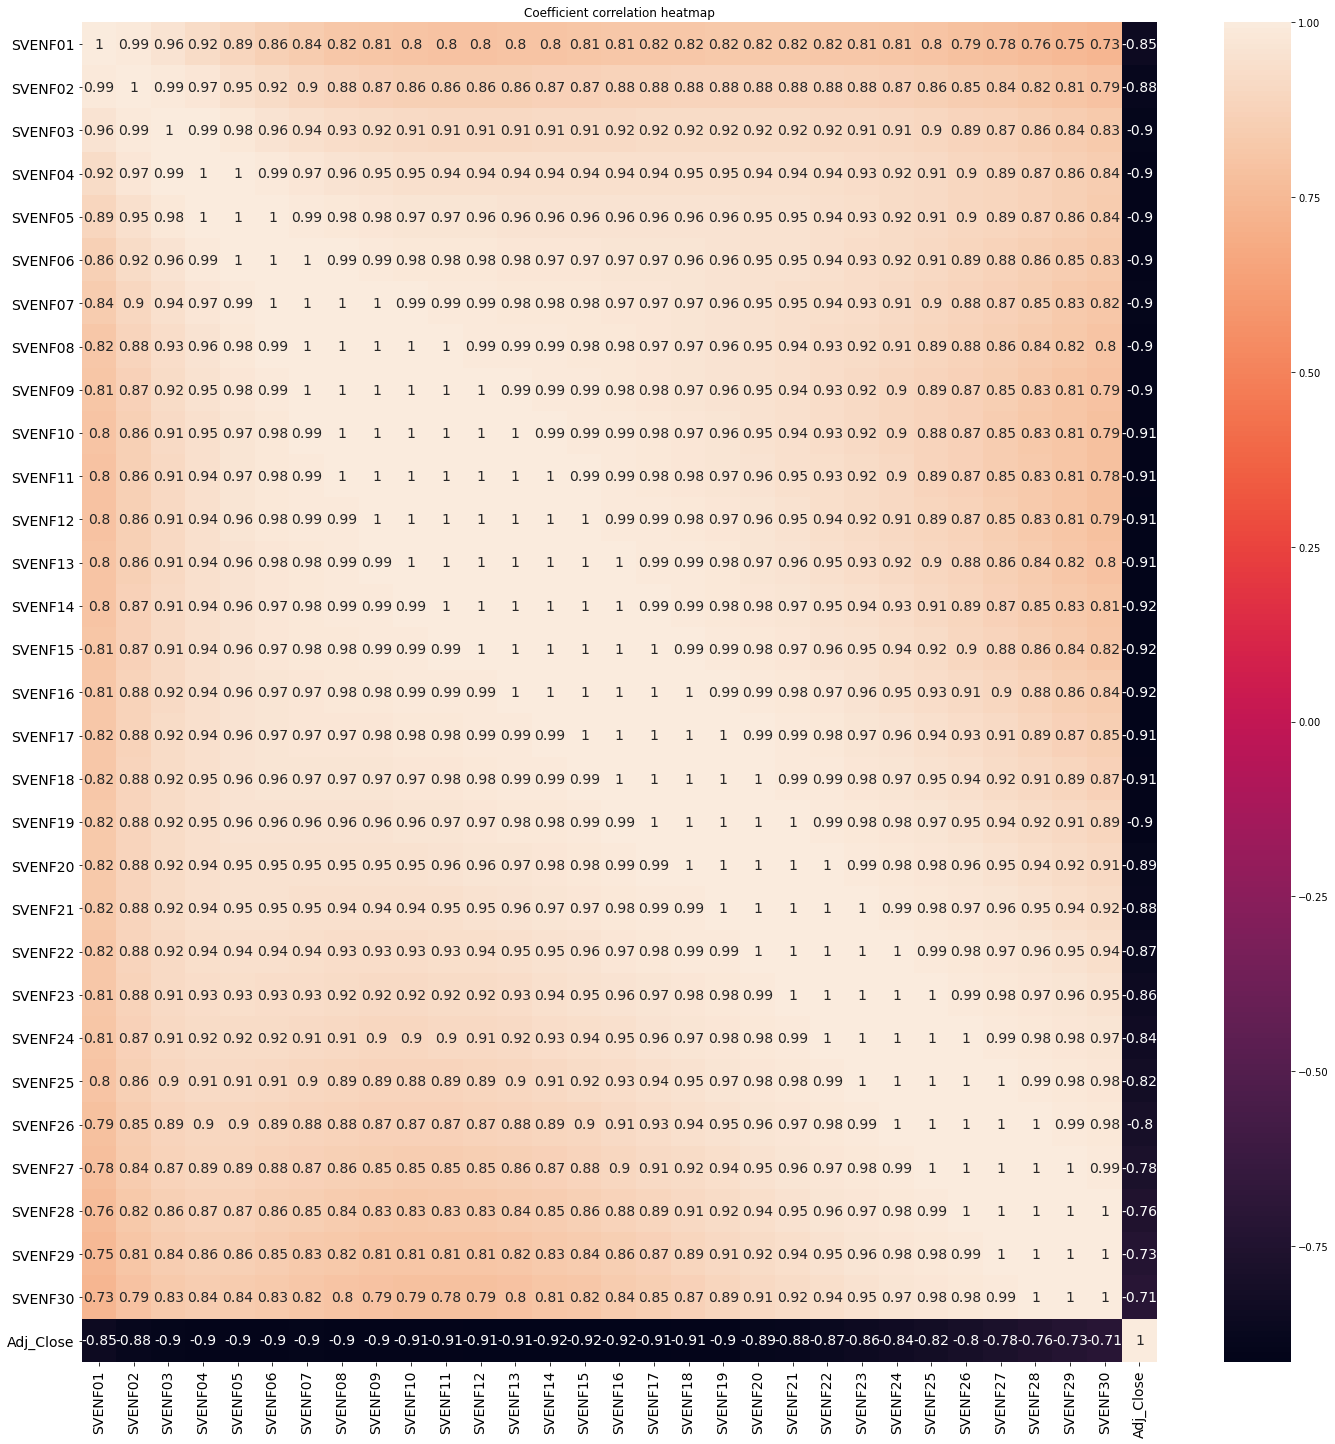

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr, annot= True, annot_kws = {"size": 14})
plt.yticks(rotation=0, size = 14); plt.xticks(rotation=90, size = 14) 
plt.tight_layout() 
plt.title('Coefficient correlation heatmap')
plt.show() 

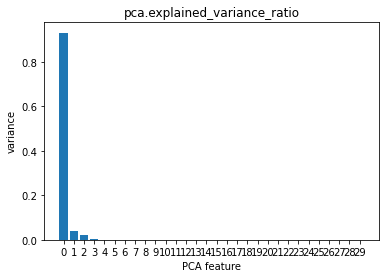

pca.explained_variance_ratio: 
[9.31796975e-01 4.07650756e-02 2.18438668e-02 4.85133058e-03
 6.63341250e-04 6.87379176e-05 9.48168675e-06 1.09876995e-06
 8.50910960e-08 6.74428451e-09 4.72621857e-10 3.80161775e-11
 9.30609065e-12 8.71811396e-12 8.59362280e-12 8.53519254e-12
 8.41818231e-12 8.32407041e-12 8.16475927e-12 8.12446450e-12
 7.94366171e-12 7.84486451e-12 7.70300119e-12 7.56475430e-12
 7.49445649e-12 7.39336209e-12 7.21415235e-12 6.93802195e-12
 6.58019099e-12 6.26023985e-12]


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.iloc[:,1:-1]
y = df['Adj_Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
pca = PCA()
pca.fit(X_train_std)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.title('pca.explained_variance_ratio')
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()
print('pca.explained_variance_ratio: ')
print(pca.explained_variance_ratio_)

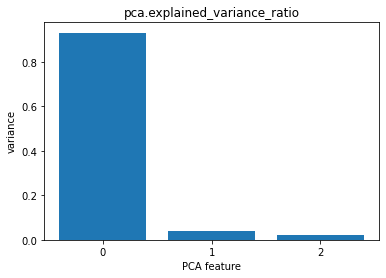

pca.explained_variance_ratio: 
[0.93179697 0.04076508 0.02184387]

cummulative explained variance of 3 components:  0.9944059173093027


In [54]:
pca = PCA(n_components = 3)
pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.title('pca.explained_variance_ratio')
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()
print('pca.explained_variance_ratio: ')
print(pca.explained_variance_ratio_)
print('')
print('cummulative explained variance of 3 components: ', pca.explained_variance_ratio_.sum())

In [106]:
from sklearn.metrics import mean_squared_error as MSE , r2_score as R2
import time
start =time.time()
reg = LinearRegression()
reg.fit(X_train_std, y_train)
y_train_pred = reg.predict(X_train_std)
y_test_pred = reg.predict(X_test_std)
print('Linear regression trained in original dataset:')
print(' ')
print('RMSE train:', np.sqrt(MSE(y_train, y_train_pred)))
print('RMSE test:', np.sqrt(MSE(y_test, y_test_pred)))
print(' ')
print('R2 score train:',R2(y_train, y_train_pred))
print('R2 score test:',R2(y_test, y_test_pred))
print(' ')
end = time.time()
time1 =end - start
print('Running time: %s Seconds'%(end-start))
print('------------------')
start =time.time()
reg.fit(X_train_pca, y_train)
y_train_pca_pred = reg.predict(X_train_pca)
y_test_pca_pred = reg.predict(X_test_pca)
print('Linear regression trained in PCA dataset:')
print(' ')
print('RMSE train:', np.sqrt(MSE(y_train, y_train_pca_pred)))
print('RMSE test:', np.sqrt(MSE(y_test, y_test_pca_pred)))
print(' ')
print('R2 score train:',R2(y_train, y_train_pca_pred))
print('R2 score test:',R2(y_test, y_test_pca_pred))
print(' ')
end = time.time()
print('Running time: %s Seconds'%(end-start))
time2 = end -start
print(' ')
print('time-saving: {:.2%}'.format((time1 - time2)/time1))

Linear regression trained in original dataset:
 
RMSE train: 0.7766533040369906
RMSE test: 0.7823695855056996
 
R2 score train: 0.9022730353400427
R2 score test: 0.9041309535337402
 
Running time: 0.015931367874145508 Seconds
------------------
Linear regression trained in PCA dataset:
 
RMSE train: 0.9052935003366371
RMSE test: 0.924130792359671
 
R2 score train: 0.8672181160186357
R2 score test: 0.8662415053375473
 
Running time: 0.010977506637573242 Seconds
 
time-saving: 31.10%


In [94]:
start =time.time()
svr = svm.SVR(kernel = 'linear')
svr.fit(X_train_std, y_train)
y_train_pred = svr.predict(X_train_std)
y_test_pred = svr.predict(X_test_std)
print('SVR trained in original dataset:')
print(' ')
print('RMSE train:', np.sqrt(MSE(y_train, y_train_pred)))
print(R'MSE test:', np.sqrt(MSE(y_test, y_test_pred)))
print(' ')
print('R2 score train:',R2(y_train, y_train_pred))
print('R2 score test:',R2(y_test, y_test_pred))
print(' ')
end = time.time()
time1 =end - start
print('Running time: %s Seconds'%(end-start))
print('------------------')
start =time.time()
svr.fit(X_train_pca, y_train)
y_train_pca_pred = svr.predict(X_train_pca)
y_test_pca_pred = svr.predict(X_test_pca)
print('SVR trained in PCA dataset:')
print(' ')
print('RMSE train:', np.sqrt(MSE(y_train, y_train_pca_pred)))
print('RMSE test:', np.sqrt(MSE(y_test, y_test_pca_pred)))
print(' ')
print('R2 score train:',R2(y_train, y_train_pca_pred))
print('R2 score test:',R2(y_test, y_test_pca_pred))
print(' ')
end = time.time()
print('Running time: %s Seconds'%(end-start))
time2 = end -start
print(' ')
print('time-saving: {:.2%}'.format((time1 - time2)/time1))

SVR trained in original dataset:
 
RMSE train: 0.8163755119489895
MSE test: 0.8286191756161301
 
R2 score train: 0.8920208361922309
R2 score test: 0.8924613825895129
 
Running time: 7.976836204528809 Seconds
------------------
SVR trained in PCA dataset:
 
RMSE train: 0.9213010197591711
RMSE test: 0.9414909385077596
 
R2 score train: 0.8624808670535458
R2 score test: 0.861168895511214
 
Running time: 5.482685565948486 Seconds
 
time-saving: 31.27%


In [109]:
print("My name is Junye Qiu")
print("My NetID is: junyeq2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Junye Qiu
My NetID is: junyeq2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


Linear model performs better both on untransformed data and PCA data than SVM does. Both model perform slightly worse on PCA data than on original data, which demonstrates that PCA works well. Running this two regression model, I find SVR is much more time-consuming and PCA could significantly reduce about 30% of running time of both moedels.